In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tesla.csv")

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
Date         1692 non-null object
Open         1692 non-null float64
High         1692 non-null float64
Low          1692 non-null float64
Close        1692 non-null float64
Volume       1692 non-null int64
Adj Close    1692 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
x = df[['High', 'Low', 'Open','Volume']].values
y = df['Close'].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(reg.coef_)

[ 8.62036395e-01  6.75416920e-01 -5.38474144e-01 -5.20341054e-08]


In [13]:
predicts = reg.predict(x_test)

In [14]:
new = pd.DataFrame({ 'Actual' : y_test.flatten(), 'Predicted' : predicts.flatten()})

In [15]:
new.head(30)

,Actual,Predicted
0,46.970001,46.754019
1,230.970001,233.520205
2,26.410000,25.812476
3,123.449997,122.805600
4,149.559998,150.543059
5,27.740000,27.707315
6,27.420000,27.670474
7,29.400000,29.206351
8,227.820007,227.127843
9,30.410000,30.239141


In [16]:
from sklearn import metrics
import math
print(" MSE: ", metrics.mean_absolute_error(y_test,predicts))
print(" RMSE: ", math.sqrt(metrics.mean_absolute_error(y_test,predicts)))

 MSE:  1.0411166655328754
 RMSE:  1.0203512461563788


<AxesSubplot:>

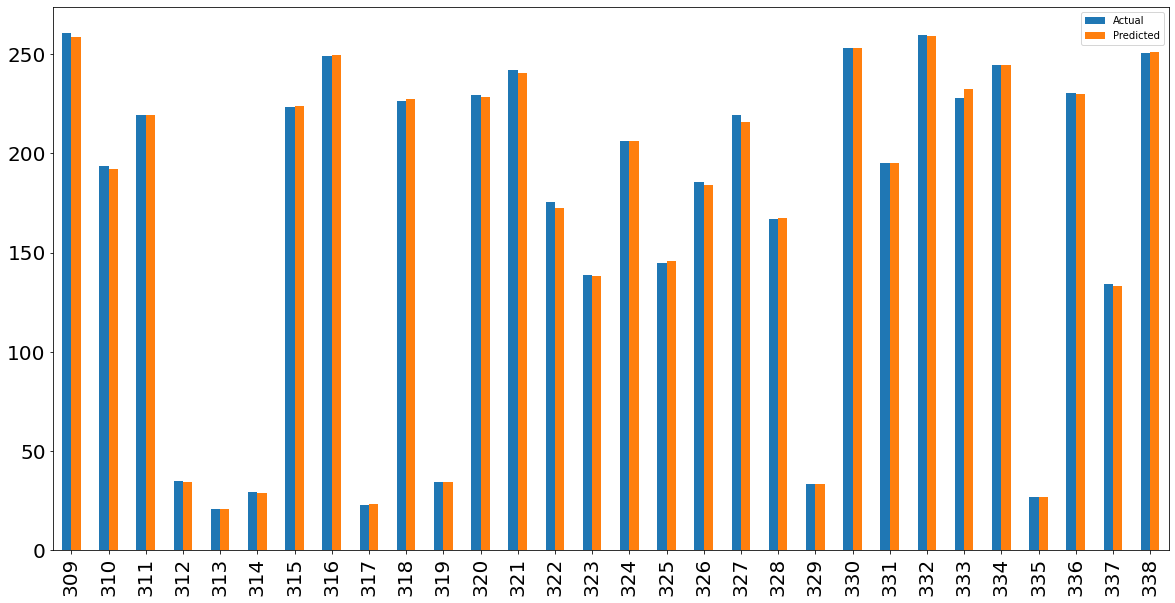

In [21]:
graph = new.tail(30)
graph.plot(figsize=(20,10), linewidth= 5, fontsize=20, kind = 'bar')

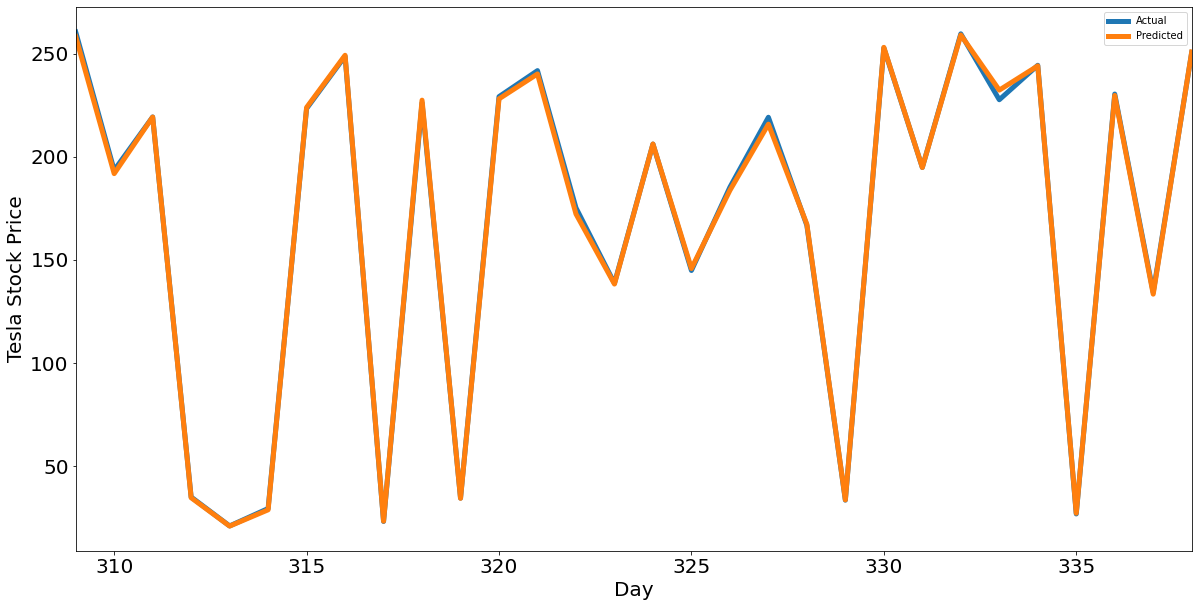

In [23]:
graph.plot(figsize=(20,10), linewidth= 5, fontsize=20)
plt.xticks()
plt.ylabel('Tesla Stock Price', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.show()